# **Food Consumption Data Visualization**


# Abstract:
Food consumption plays a crucial role in understanding dietary patterns, nutrition availability,
and food security across different regions of the world. This project uses data visualization
techniques to analyze food consumption patterns using official data provided by the Food and
Agriculture Organization (FAO) of the United Nations.

The objective of this project is to explore food supply trends across countries and years,
identify major food items consumed, and compare consumption patterns using meaningful
visualizations. Python libraries such as Pandas, Matplotlib, Seaborn, and Plotly are used to
create clear and interactive visual representations of the data.

## 2. Import Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
df = pd.read_csv("FoodBalanceSheets_E_All_Data_NOFLAG.csv", encoding="latin1", engine='python')

df.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (FBS),Item,Element Code,Element,Unit,Y2010,...,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021
0,2,'004,Afghanistan,2501,'S2501,Population,511,Total Population - Both sexes,1000 No,28189.67,...,30466.48,31541.21,32716.21,33753.50,34636.21,35643.42,36686.78,37769.50,38972.23,40099.46
1,2,'004,Afghanistan,2501,'S2501,Population,5301,Domestic supply quantity,1000 t,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2,'004,Afghanistan,2901,'S2901,Grand Total,664,Food supply (kcal/capita/day),kcal/cap/d,2208.00,...,2173.00,2211.00,2276.00,2257.00,2245.00,2311.00,2265.00,2228.00,2266.00,2198.00
3,2,'004,Afghanistan,2901,'S2901,Grand Total,661,Food supply (kcal),million Kcal,22714261.33,...,24159167.28,25454589.34,27175651.90,27801087.57,28387789.82,30065075.35,30333341.93,30720033.32,32233236.80,32169079.00
4,2,'004,Afghanistan,2901,'S2901,Grand Total,674,Protein supply quantity (g/capita/day),g/cap/d,65.76,...,62.86,63.40,65.71,64.07,64.95,65.42,62.94,60.98,63.35,60.70


## 3. Understanding the Dataset Structure

In [11]:
# Check dataset size
print("Rows, Columns:", df.shape)

# View column names
print("\nColumns in dataset:\n", df.columns)

# Check missing values (top few columns)
df.isnull().sum().head(10)


Rows, Columns: (369428, 21)

Columns in dataset:
 Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item Code (FBS)',
       'Item', 'Element Code', 'Element', 'Unit', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021'],
      dtype='object')


,0
Area Code,0
Area Code (M49),0
Area,0
Item Code,0
Item Code (FBS),0
Item,0
Element Code,0
Element,0
Unit,1
Y2010,32089


## 4. Reshaping the Dataset (Wide Format to Long Format)

In [12]:
# Convert wide year columns into long format
year_cols = [col for col in df.columns if col.startswith('Y')]

df_long = df.melt(
    id_vars=['Area', 'Item', 'Element', 'Unit'],
    value_vars=year_cols,
    var_name='Year',
    value_name='Value'
)

# Convert Year from 'Y2010' → 2010
df_long['Year'] = df_long['Year'].str[1:].astype(int)

df_long.head()


,Area,Item,Element,Unit,Year,Value
0,Afghanistan,Population,Total Population - Both sexes,1000 No,2010,28189.67
1,Afghanistan,Population,Domestic supply quantity,1000 t,2010,0.00
2,Afghanistan,Grand Total,Food supply (kcal/capita/day),kcal/cap/d,2010,2208.00
3,Afghanistan,Grand Total,Food supply (kcal),million Kcal,2010,22714261.33
4,Afghanistan,Grand Total,Protein supply quantity (g/capita/day),g/cap/d,2010,65.76


## 5. Filtering Food Consumption Data

In [13]:
# Filter food consumption per capita data
food_df = df_long[
    df_long['Element'] == 'Food supply quantity (kg/capita/yr)'
]

# Select required columns
food_df = food_df[['Area', 'Item', 'Year', 'Value']]

# Rename columns for clarity
food_df.rename(columns={
    'Area': 'Country',
    'Item': 'Food_Item',
    'Value': 'Consumption_kg_per_capita'
}, inplace=True)

food_df.head()

,Country,Food_Item,Year,Consumption_kg_per_capita
32,Afghanistan,Cereals - Excluding Beer,2010,202.73
50,Afghanistan,Wheat and products,2010,174.68
68,Afghanistan,Rice and products,2010,24.52
86,Afghanistan,Barley and products,2010,1.13
105,Afghanistan,Maize and products,2010,1.90


## 6. Data Cleaning and Final Preparation


In [14]:
# Remove missing and zero values (safety step)
food_df = food_df.dropna()
food_df = food_df[food_df['Consumption_kg_per_capita'] > 0]

# Final structure check
food_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 225057 entries, 32 to 4433126
Data columns (total 4 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Country                    225057 non-null  object 
 1   Food_Item                  225057 non-null  object 
 2   Year                       225057 non-null  int64  
 3   Consumption_kg_per_capita  225057 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.6+ MB


## 7. Visualization 1: Top 10 Most Consumed Food Items

/tmp/ipython-input-86007059.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


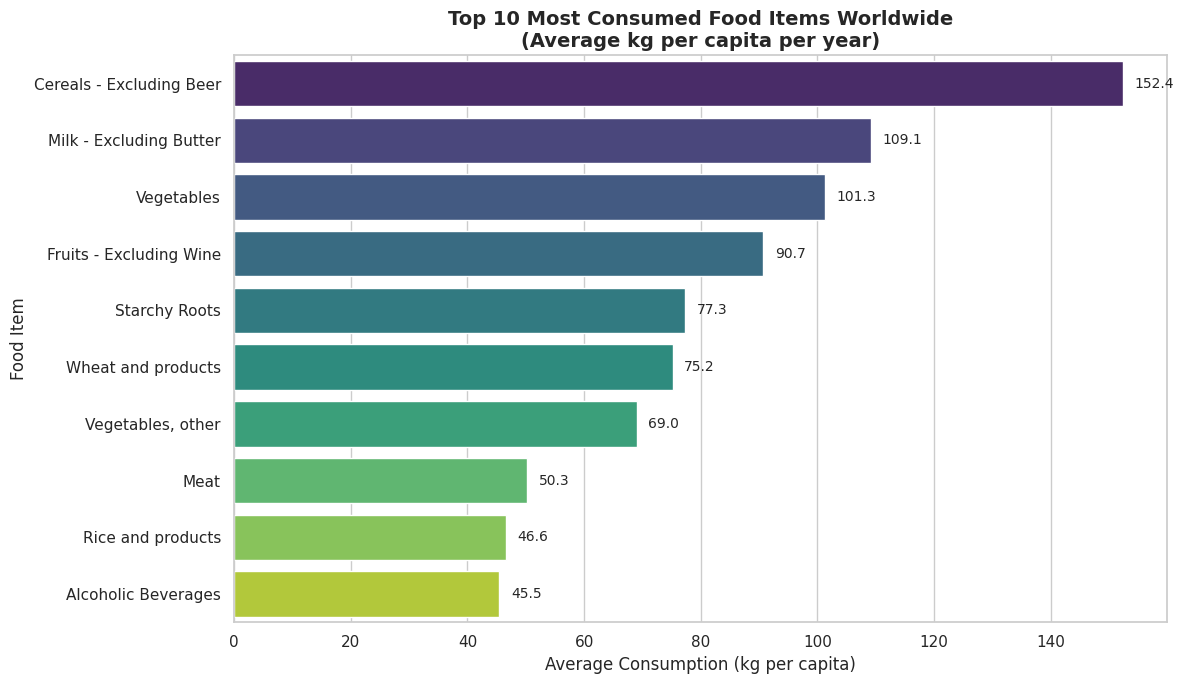

In [15]:
# Calculate average consumption per food item
top_foods = (
    food_df
    .groupby('Food_Item')['Consumption_kg_per_capita']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x=top_foods.values,
    y=top_foods.index,
    palette="viridis"
)

# Add value labels
for i, v in enumerate(top_foods.values):
    ax.text(v + 2, i, f"{v:.1f}", va='center', fontsize=10)

# Titles & labels
plt.title("Top 10 Most Consumed Food Items Worldwide\n(Average kg per capita per year)", fontsize=14, weight='bold')
plt.xlabel("Average Consumption (kg per capita)", fontsize=12)
plt.ylabel("Food Item", fontsize=12)

plt.tight_layout()
plt.show()


## 8. Visualization 2: Food Consumption Trend Over Years


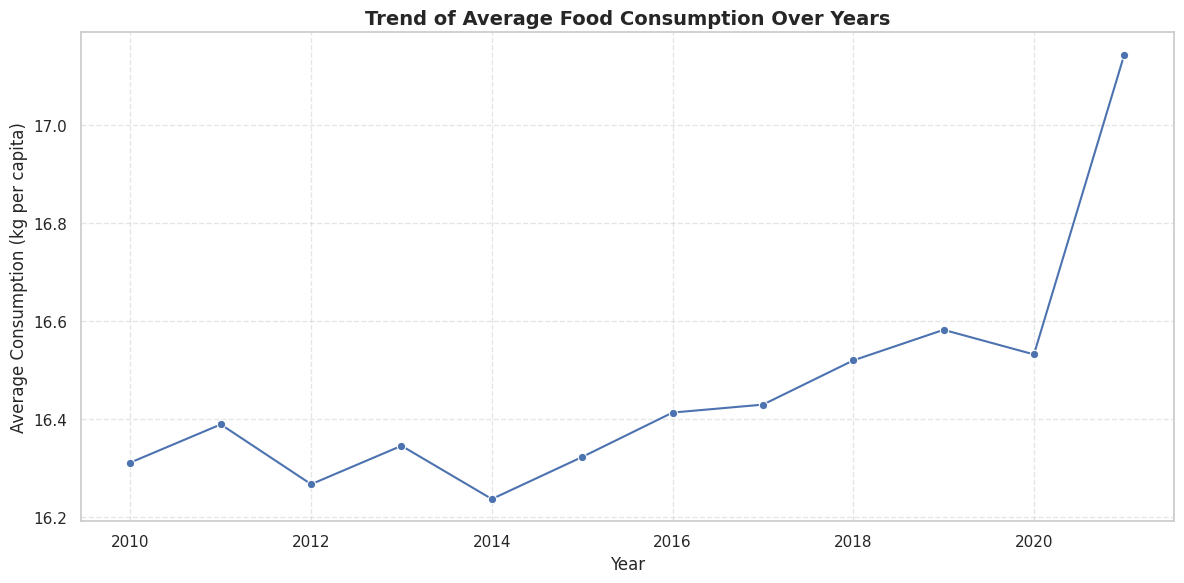

In [16]:
# Calculate average food consumption per year
yearly_trend = (
    food_df
    .groupby('Year')['Consumption_kg_per_capita']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=yearly_trend,
    x='Year',
    y='Consumption_kg_per_capita',
    marker='o'
)

plt.title("Trend of Average Food Consumption Over Years", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Average Consumption (kg per capita)")
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 9. Visualization 3: Top 10 Countries by Food Consumption

/tmp/ipython-input-2154672092.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


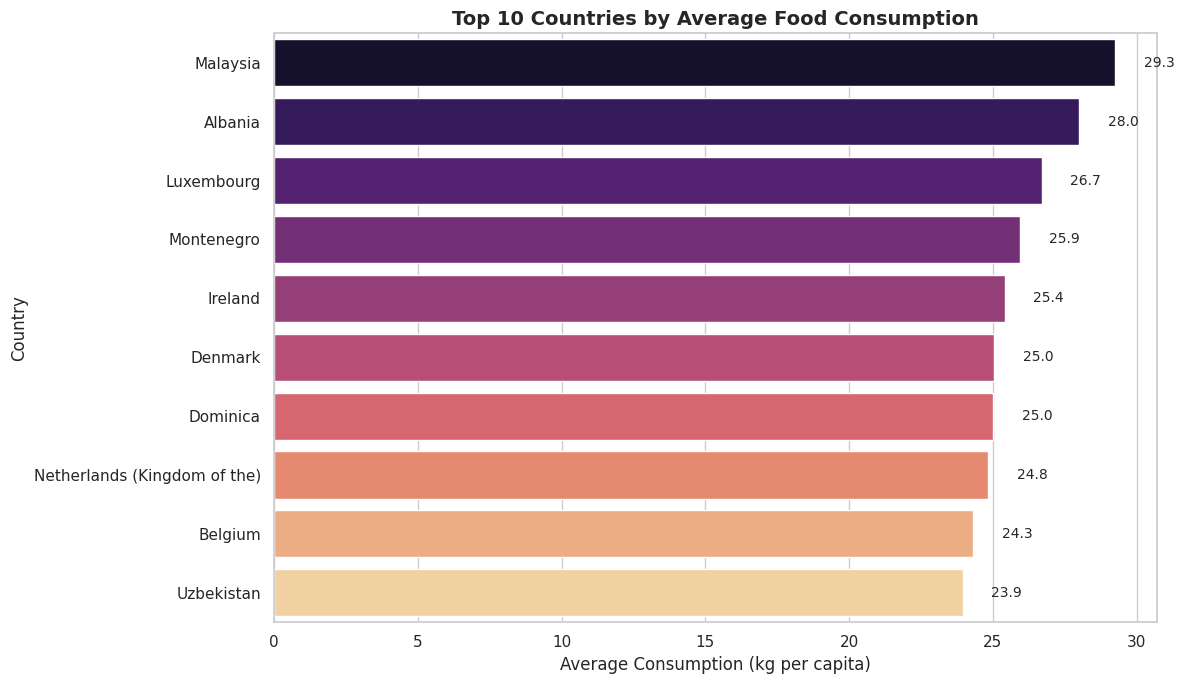

In [17]:
# Calculate average food consumption per country
top_countries = (
    food_df
    .groupby('Country')['Consumption_kg_per_capita']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette="magma"
)

# Add value labels
for i, v in enumerate(top_countries.values):
    plt.text(v + 1, i, f"{v:.1f}", va='center', fontsize=10)

plt.title("Top 10 Countries by Average Food Consumption", fontsize=14, weight='bold')
plt.xlabel("Average Consumption (kg per capita)")
plt.ylabel("Country")

plt.tight_layout()
plt.show()


## 10. Visualization 4: Food Consumption by Category (Stacked Bar Chart)


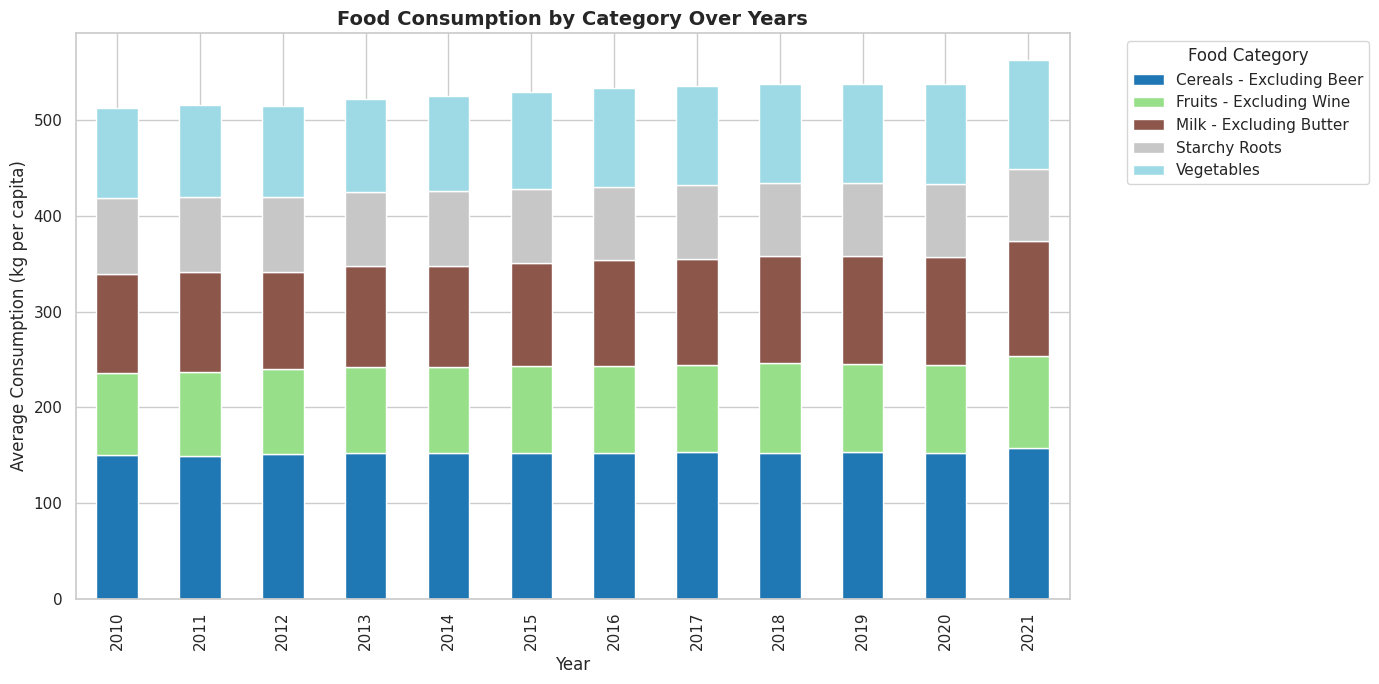

In [18]:
# Select top 5 most consumed food items
top_categories = (
    food_df
    .groupby('Food_Item')['Consumption_kg_per_capita']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter data for these categories
category_df = food_df[food_df['Food_Item'].isin(top_categories)]

# Pivot for stacked bar chart
stacked_df = (
    category_df
    .groupby(['Year', 'Food_Item'])['Consumption_kg_per_capita']
    .mean()
    .reset_index()
    .pivot(index='Year', columns='Food_Item', values='Consumption_kg_per_capita')
)

# Plot stacked bar chart
stacked_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'
)

plt.title("Food Consumption by Category Over Years", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Average Consumption (kg per capita)")
plt.legend(title="Food Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## 11. Visualization 5: Share of Major Food Items in Total Consumption

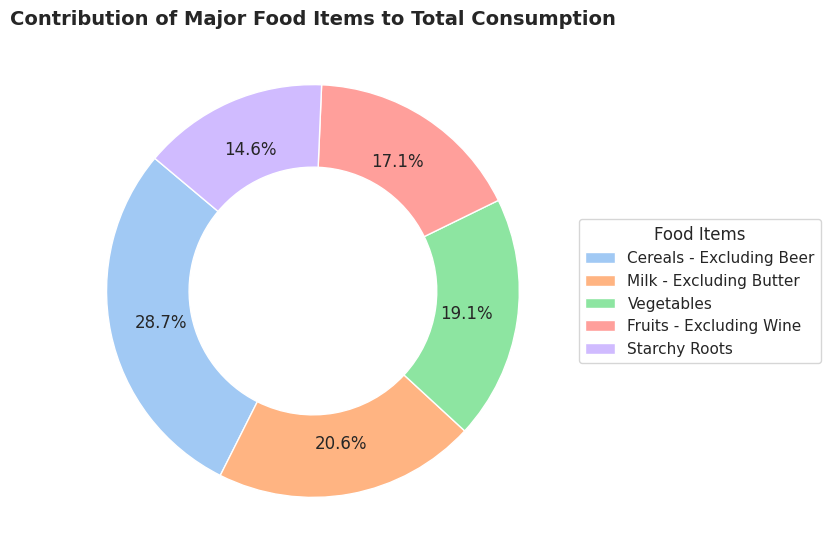

In [27]:
# Calculate average consumption for top 5 food items
pie_data = (
    food_df
    .groupby('Food_Item')['Consumption_kg_per_capita']
    .mean()
    .sort_values(ascending=False)
    .head(5)
)

colors = sns.color_palette("pastel")

plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    pie_data.values,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),
    pctdistance=0.75  # keeps % inside the donut
)

# Add legend instead of labels on slices
plt.legend(
    wedges,
    pie_data.index,
    title="Food Items",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.title(
    "Contribution of Major Food Items to Total Consumption",
    fontsize=14,
    weight='bold'
)

plt.tight_layout()
plt.show()

## 12. Visualization 6: Heatmap of Food Consumption (Country vs Food Item)


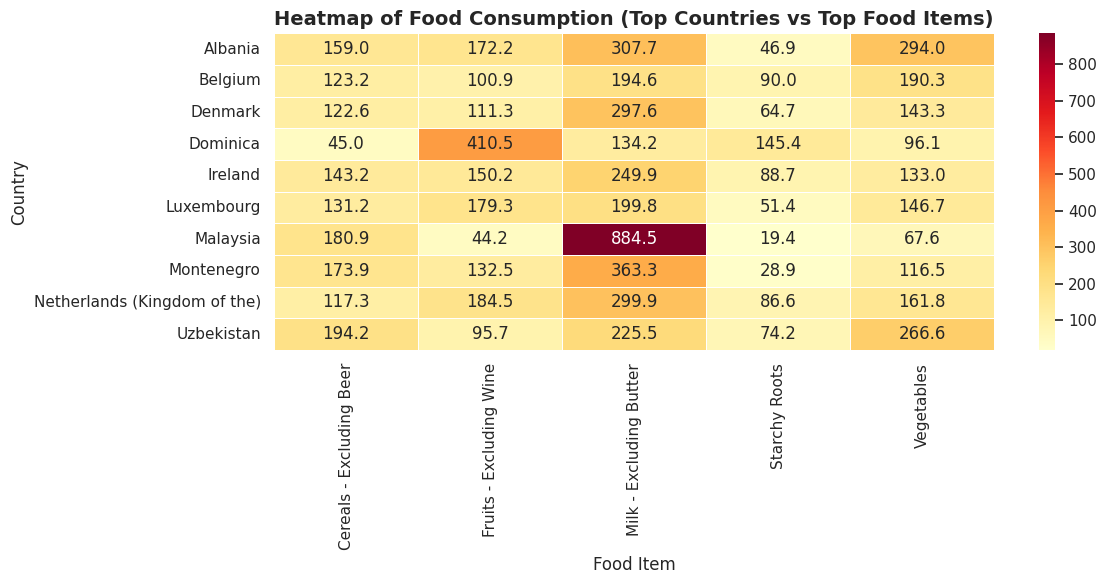

In [22]:
# Select top 10 countries by average consumption
top_countries = (
    food_df
    .groupby('Country')['Consumption_kg_per_capita']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Select top 5 food items
top_items = (
    food_df
    .groupby('Food_Item')['Consumption_kg_per_capita']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter dataset
heatmap_df = food_df[
    (food_df['Country'].isin(top_countries)) &
    (food_df['Food_Item'].isin(top_items))
]

# Create pivot table
pivot_df = heatmap_df.pivot_table(
    index='Country',
    columns='Food_Item',
    values='Consumption_kg_per_capita',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd",
    linewidths=0.5
)

plt.title(
    "Heatmap of Food Consumption (Top Countries vs Top Food Items)",
    fontsize=14,
    weight='bold'
)
plt.xlabel("Food Item")
plt.ylabel("Country")

plt.tight_layout()
plt.show()